<class 'pandas.core.series.Series'>
------------------
+++++++++++++
   Description   Amount
7     CCY CONV     0.01
2     APPLE.CO     1.48
12    FRUITS V     2.00
35    VEGGYYA      2.90
0     2C2*AMZN     2.99
10    EVERGREE     4.90
17    MINMED C     5.00
36    WATSON'S     6.10
9     ENCIK TA     6.30
33    UMISUSHI     6.95
16    MCDONALD     7.75
19    MR COCON     8.30
6     CALTEX -     9.05
38    www.anyw    10.00
8     DAISO JA    10.80
32    TOAST BO    12.90
20    McDonald    13.20
15    LOVELY F    13.54
26    SHAW THE    13.90
4     BEDOK GA    14.00
1     ACE FRES    17.95
37    fp*Food     19.19
21    NET*SUBW    21.70
11    FAIRPRIC    23.00
31    THE SOUP    26.30
29    SUBWAY -    27.50
30    Shaw The    33.00
34    UNITY BY    35.11
14    L'OCCITA    42.00
27    SINGTEL     50.36
22    NTUC FP     54.48
13    GOJEK 90    55.50
25    SC* XDAD    76.49
5     BUS/MRT     89.13
28    SP Digit   104.65
3     ATOME* M   107.76
23    NTUC Fai   176.03
24    Prudenti  151

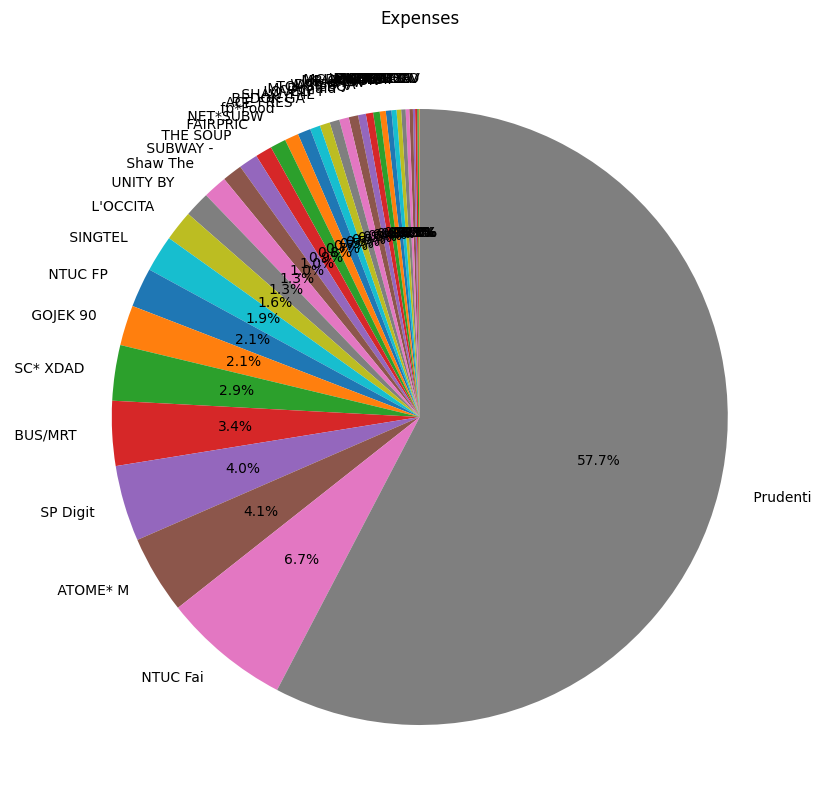

In [75]:
import tabula
import pandas as pd
import numpy as np
# from matplotlib import rc, pyplot as plt
import matplotlib.pyplot as plt
import random





# Read pdf into list of DataFrame
dfs = tabula.read_pdf("CardStatement_Sep2023.pdf", pages='all', encoding='utf-8', guess=False, lattice=False, stream=True)

appended_data = []

for df in dfs[1:]:
    df3 = df.drop_duplicates();
    df4 = df3.dropna(axis=1, how='all');
    df5 = df4.dropna(axis=0, how='all');

    df6 = df5.map(lambda x: x.strip() if isinstance(x, str) else x)

    df6.columns = [*df6.columns[:-1], 'Amount']


    df6['Date']=df5['Unnamed: 0'].str.slice(stop=6)+' 2023'
    df6['Description']=df5['Unnamed: 0'].str.slice(start=6)
    df7 = df6.filter(['Date','Description','Amount'])

    df7['Date'] = pd.to_datetime(df7['Date'],format='%d %b %Y',errors='coerce')
    df7 = df7.dropna(subset=['Date'])
    df7['Amount'] = df7['Amount'].astype(str)
    df7['Amount'] = df7['Amount'].str.replace(r'[^0-9.]', '', regex=True)
    df7['Amount'] = pd.to_numeric(df7['Amount'], errors='coerce')

    appended_data.append(df7)
 
appended_data = pd.concat(appended_data).reset_index(drop=True)
appended_data = appended_data.groupby(appended_data['Description'].str[:9])['Amount'].sum().reset_index()

appended_data = appended_data.drop(appended_data.index[appended_data['Amount'] == 1487.73])
appended_data = appended_data.sort_values('Amount')

# appended_data.drop(appended_data[appended_data['Description'].str == "MONEYSEN"].index)

result_df = pd.DataFrame(appended_data, columns=['Description', 'Amount'])
result_df=result_df[result_df["Description"].str.contains("MONEYSEN")== False]

print(type(result_df['Description']))
print(result_df)


# report generation starts here 
labels = result_df['Description']
sizes = result_df['Amount']

plt.figure(figsize=(14, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Create a custom legend with labels and manually specified colors
legend_labels = labels
legend_colors = [(random.random(), random.random(), random.random(), 1) for _ in range(39)]


# Create a legend table with one column for labels and one column for colors
# legend_table_data = [[label, ''] for label in legend_labels]
# legend_table = plt.table(cellText=legend_table_data,
#                          loc='center',
#                          cellLoc='center',
#                          colColours=['lightgray', 'lightgray'],
#                          cellColours=[['lightgray', color] for color in legend_colors],
#                          bbox=[0.85, 0.1, 0.1, 0.5])

# Customize the appearance of the legend table
# legend_table.auto_set_font_size(False)
# legend_table.set_fontsize(14)
# legend_table.scale(1, 2)

# Remove axis labels and ticks
plt.axis('off')

 

plt.title('Expenses')
plt.show()


 